# Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## *Functions*

In [ ]:
#Read CSVs
def get_data():
    """
    Get training, validation and test data
    """
    train = pd.read_csv("./PA1_train.csv")
    dev = pd.read_csv("./PA1_dev.csv")
    test = pd.read_csv("./PA1_test.csv")
    return train,dev,test

#Add bias
def add_bias(df):
    """
    Add dummy variable to control intercept
    """
    df["dummy"] = 1
    return df

#Seperate Features from response
def seperate(df_train):
    """
    input: dataframe
    """
    #Grab all continuous features
    x = df_train.iloc[:,0:-1]
    #Split dates
    x = split_date(x)
    x = x.drop(["date"], axis=1)
    #Grab response y
    y = df_train.iloc[:,-1]
    
    return x,y
    
    
#Add new features [Month, Day, Year]
def split_date(df_train):
    """
    splits date into seperate features
    input: dataframe
    """
    print("Splitting date...")
    for i in range(0,len(df_train)):
        df_train.loc[i,"month"] = int(df_train.loc[i,"date"].split("/")[0])
        df_train.loc[i,"day"] = int(df_train.loc[i,"date"].split("/")[1])
        df_train.loc[i,"year"] = int(df_train.loc[i,"date"].split("/")[2])
    print("Done")
    return df_train

#Normalize data
def normalize(df1):
    """
    Normalizes feature matrix
    input: feature df
    """
    print("Normalizing...")
    x = (df1 - np.min(df1))/(np.max(df1) - np.min(df1))
    print("DONE")
    return x

#Linear regression function
def linear_regress(x,y,eta,t,lamb):
    """
    x: input/features
    y: opuput
    eta: learning rate
    t: iterations
    lamb: regularization constant
    """
    print(f'#Learning Rate : {eta}#####')
    
    n = 0
    e = np.zeros(len(y))
    errors = []
    gradient = []
    
    #Initialize weights [w] and predictions [y_hat]
    w = np.zeros(len(x[0]))
    
    cur_grad = 0
    prev_grad = 0
     
    while n<t:
        #Initialize gradient for each epoch
        gradient_vector = np.zeros(len(x[0]))
        
        """        
        #Traverse through each data point   
        for i in range(len(x)):
            #Predicted value
            y_hat = np.dot(w.T,x[i])

            #Error
            e[i] = ((y[i] - y_hat)**2)
            
            
            #Regularization
            if np.dot(w.T,w) == 0:
                r = 0
            else:
                r = (np.dot(w.T,w))**0.5
            
            #Traverse through each feature to update corresponding weights
            #for j in range(len(x[0])):
            #    gradient_vector[j] += ((-2)*(y[i] - y_hat)*x[i,j]) + (2*lamb*r)
            gradient_vector += 
        """
        
        #y_hat = np.matmul(w.T, x)
        y_hat = np.matmul(x, w)
        e = (y-y_hat)**2
        
        gradient_vector = (-2)*np.matmul(x.T, (y-y_hat))  
        
        #Update weights
        w -=  eta*gradient_vector
        #Calculate SSE
        errors.append(sum(e))
        #Norm of gradient
        convergence_criteria = np.dot(gradient_vector.T,gradient_vector)**0.5
        gradient.append(convergence_criteria)
        
        ####
        #print(f'#####Iteration : {n+1}#####')
        #print(f'Gradient : {gradient[n]}')

        
        ####
        if (gradient[n]/(10**9)) > 1 and (n+1) <= 6:
            t = 8
        
        n += 1
        if convergence_criteria < 0.5:
            print(f'#Iteration : {n}#####')
            print(f'Gradient : {gradient[n-1]}')
            print()
            print()
            print()
            return w,errors,gradient, n
        if (n) % 5000 == 0:
            print(f'#Iteration : {n}#####')
            print(f'Gradient : {gradient[n-1]}')

    print(f'#Iteration : {n}#####')
    print(f'Gradient : {gradient[n-1]}')
    print()
    print()
    print()
    return w,errors,gradient, n

In [ ]:
#####DATA PREP#####

#load csv
df_train,df_dev,df_test = get_data()
#Drop ID Feature
df_train = df_train.drop("id", axis=1)

#Grab features and Response
x,y = seperate(df_train)

#Normalize continuous features
x_norm_df = normalize(x)
#Add Bias 
x_norm_df = add_bias(x_norm_df)
x_norm = x_norm_df.values

x_norm_df

In [ ]:
weights1, sse1, gradient1, iter1 = linear_regress(x_norm, y, 10**0,  200000, 0)
weights2, sse2, gradient2, iter2 = linear_regress(x_norm, y, 10**-1, 200000, 0)
weights3, sse3, gradient3, iter3 = linear_regress(x_norm, y, 10**-2, 200000, 0)
weights4, sse4, gradient4, iter4 = linear_regress(x_norm, y, 10**-3, 200000, 0)
weights5, sse5, gradient5, iter5 = linear_regress(x_norm, y, 10**-4, 200000, 0)
weights6, sse6, gradient6, iter6 = linear_regress(x_norm, y, 10**-5, 500000, 0)
weights7, sse7, gradient7, iter7 = linear_regress(x_norm, y, 10**-6, 5000000, 0)
weights8, sse8, gradient8, iter8 = linear_regress(x_norm, y, 10**-7, 50000000, 0)


In [27]:
sse1

[417729.13677477534,
 1441711259931547.5,
 6.794374698184466e+24,
 3.202181295174746e+34,
 1.5091845552447712e+44,
 7.112770364740612e+53,
 3.352240922803048e+63,
 1.579907494303781e+73]

In [60]:
#x_norm_df

Text(0, 0.5, 'SSE')

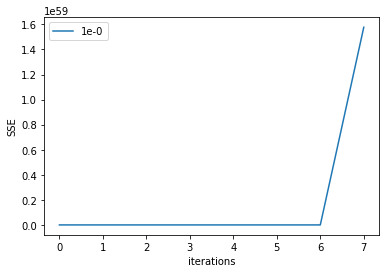

In [8]:
plt.plot(sse)
plt.legend(['1e-0'])
plt.xlabel('iterations')
plt.ylabel('SSE')